## Tipos de distribuição Naive Bayes.

### importações

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

### Naive bayes bernoulli

* Esse modelo é recomendado em distribuições binarias

In [3]:
dataset = pd.read_csv('census.csv')

* Exemplo de aplicação e performance, prevendo o salario com a variavel sex 

In [9]:
dataset['income'].unique(), dataset['sex'].unique()

(array([' <=50K', ' >50K'], dtype=object),
 array([' Male', ' Female'], dtype=object))

In [56]:
X = dataset['sex'].values
X

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [61]:
y = dataset['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X)
X = label_encoder.transform(X)

In [58]:
X, np.unique(X)

(array([1, 1, 1, ..., 0, 1, 0]), array([0, 1]))

In [59]:
X = X.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


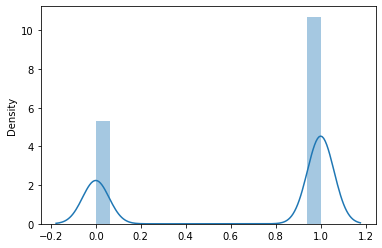

In [60]:
sns.distplot(X)



> **NOTA:** A distribuição de Bernoulli é uma distribuição discreta que consiste em apenas um estudo com 2 resultados (sucesso / fracasso). Constitui a base para definir outras distribuições mais complexas.



In [62]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [63]:
bernoulli_naive_bayes = BernoulliNB()
bernoulli_naive_bayes.fit(X, y);

In [64]:
previsoes = bernoulli_naive_bayes.predict(X)

In [65]:
accuracy_score(y, previsoes)

0.7591904425539756

### Naive bayes multinomial

> **NOTA:** A distribuição multinomial é uma distribuição que consiste em multi-valores categoricos.

In [67]:
dataset.head(n=1)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [68]:
from sklearn import preprocessing
label_encoder0 = preprocessing.LabelEncoder()
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
label_encoder4 = preprocessing.LabelEncoder()
label_encoder5 = preprocessing.LabelEncoder()
label_encoder6 = preprocessing.LabelEncoder()

In [72]:
dataset['workclass'] = label_encoder0.fit_transform(dataset['workclass'])
dataset['education'] = label_encoder1.fit_transform(dataset['education'])
dataset['marital-status'] = label_encoder2.fit_transform(dataset['marital-status'])
dataset['occupation'] = label_encoder3.fit_transform(dataset['occupation'])
dataset['relationship'] = label_encoder4.fit_transform(dataset['relationship'])
dataset['race'] = label_encoder5.fit_transform(dataset['race'])
dataset['native-country'] = label_encoder6.fit_transform(dataset['native-country'])

In [73]:
dataset.head(n=1)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K


In [74]:
X = dataset.iloc[:, [1,3,5,6,7,8,13]].values
X

array([[ 7,  9,  4, ...,  1,  4, 39],
       [ 6,  9,  2, ...,  0,  4, 39],
       [ 4, 11,  0, ...,  1,  4, 39],
       ...,
       [ 4, 11,  6, ...,  4,  4, 39],
       [ 4, 11,  4, ...,  3,  4, 39],
       [ 5, 11,  2, ...,  5,  4, 39]])

In [75]:
y = dataset['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [77]:
from sklearn.naive_bayes import MultinomialNB

multinomial_naive_bayes = MultinomialNB()
multinomial_naive_bayes.fit(X, y);

In [78]:
previsoes = multinomial_naive_bayes.predict(X)

In [79]:
accuracy_score(y, previsoes)

0.7485949448727005

## Algoritmo K-NN (distribuição desbalanceada)

KNN(K — Nearest Neighbors) é um algoritmo ( de aprendizagem supervisionada ) usado no campo de machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado do outro. quanto mais proximo for suas similaridades, maior performance o algoritmo terá.

In [82]:
credit = pd.read_csv('credit_data.csv')
credit.dropna(inplace=True)
credit.head(n=1)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0


### (Distribuição desbalanceada)

In [83]:
X = credit.iloc[:, 1:4].values

In [84]:
y = credit['c#default'].values

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2,
                                                                 stratify=y)

* Coluna income - Salario

In [91]:
np.mean(X_treinamento[0]), np.median(X_treinamento[0]), np.std(X_treinamento[0])

(14470.270798026448, 6463.64775060681, 16069.515715219362)

In [92]:
np.mean(X_teste[0]), np.median(X_teste[0]), np.std(X_teste[0])

(8303.661909918736, 51.949242778070094, 11679.376365072929)

* Treinamento K-NN

In [94]:
knn = KNeighborsClassifier()
knn.fit(X_treinamento, y_treinamento);

In [95]:
previsoes = knn.predict(X_teste)

In [96]:
accuracy_score(y_teste, previsoes)

0.825

### (Distribuição padronizada)

* Padronização dos dados aumentando a linha de similaridade.

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
z_score_treinamento = StandardScaler()
z_score_teste = StandardScaler()

In [108]:
X_treinamento_p = z_score_treinamento.fit_transform(X_treinamento)
X_teste_p = z_score_teste.fit_transform(X_teste)

In [109]:
X_treinamento_p, X_teste_p

(array([[-0.60190449,  0.99567597,  0.66029358],
        [ 0.46594264, -1.27885742,  0.1000624 ],
        [-0.50464092,  0.30173978,  0.97144309],
        ...,
        [ 1.31780229, -1.02183887,  2.52321232],
        [ 1.21188934, -0.06735809,  1.58219107],
        [-1.39461735, -0.89585704, -0.74285998]]),
 array([[-1.36695643, -0.20968017, -1.3859428 ],
        [ 0.90706001,  1.4349038 ,  1.34177255],
        [ 0.47579175, -0.79713957,  0.72582896],
        ...,
        [-0.53480994, -0.5521364 , -1.2239975 ],
        [-1.28957427,  1.31178484, -0.72570142],
        [ 0.78402443, -0.81962011, -0.68857472]]))

* coluna income - Salario

In [110]:
np.mean(X_treinamento_p[0]), np.median(X_treinamento_p[0]), np.std(X_treinamento_p[0])

(0.3513550212307656, 0.6602935806816758, 0.6878217353156304)

In [111]:
np.mean(X_teste_p[0]), np.median(X_teste_p[0]), np.std(X_teste_p[0])

(-0.9875264668704601, -1.3669564279276045, 0.5500750038000027)

In [112]:
knn = KNeighborsClassifier()
knn.fit(X_treinamento_p, y_treinamento);

In [113]:
previsoes = knn.predict(X_teste_p)

In [114]:
accuracy_score(y_teste, previsoes)

0.985